# Introduction

With the extensive use of credit cards, fraud appears as a major issue in the credit card business. It is hard to have some figures on the impact of fraud, since companies and banks do not like to disclose the amount of losses due to frauds. At the same time, public data are scarcely available for confidentiality issues, leaving unanswered many questions about what is the best strategy. Another problem in creditcard fraud loss estimation is that we can measure the loss of only those frauds that have been detected, and it is not possible to assess the size of unreported/undetected frauds. Fraud patterns are changing rapidly where fraud detection needs to be re-evaluated from a reactive to a proactive approach.

In recent years, machine learning has gained lot of popularity in image analysis, natural language processing and speech recognition. In this regard, implementation of efficient fraud detection algorithms using machine-learning techniques is key for
reducing these losses, and to assist fraud investigators. In this Notebook, machine learning methods are used to detect credit card fraud. The main purpose of this Notebook is to learn how to use, apply and review options for using machine learning and to receive additional comments, recommendations from Kaggle experts, other data scientists.

The results show logistic regression based approaches outperforms with the highest accuracy and it can be effectively used for fraud investigators.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Introduction

In recent years credit card usage is predominant in modern day society and credit card fraud is keep on growing. Financial losses due to fraud affect not only merchants and banks (e.g. reimbursements), but also individual clients. If the bank loses money, customers eventually pay as well through higher interest rates, higher membership fees, etc. Fraud may also affect the reputation and image of a merchant causing non-financial losses that, though difficult to quantify in the short term, may become visible in the long period.

A Fraud Detection System (FDS) should not only detect fraud cases efficiently, but also be cost-effective in the sense that the cost invested in transaction screening should not be higher than the loss due to frauds [1]. Bhatla [2] shows that screening only 2% of transactions can result in reducing fraud losses accounting for 1% of the total value of transactions. However, a review of 30% of transactions could reduce the fraud losses drastically to 0.06%, but increase the costs exorbitantly. In order to minimize costs of detection it is important to use expert rules and statistical based models (e.g. Machine Learning) to make a first screen between genuine and potential fraud and ask the investigators to review only the cases with high risk.

The predictive model scores each transaction with high or low risk of fraud and those with high risk generate alerts. Investigators check these alerts and provide a feedback for each alert, i.e. true positive (fraud) or false positive (genuine). These feedbacks can then be used to improve the model. A predictive model can be built upon experts’ rules, i.e. rules based
on knowledge from fraud experts, but these require manual tuning and human supervision. Alternatively, with Machine Learning
(ML) techniques [3] we can efficiently discover fraudulent patterns and predict transactions that are probably to be fraudulent. ML techniques consist in inferring a prediction model on the basis of a set of examples. The model is in most cases a parametric function, which allows predicting the likelihood of a transaction to be fraud, given a set of features describing the transaction.

Most banks considers huge transactions, among which very few is fraudulent, often less than 0.1% [4]. Also, only a limited number of transactions can be checked by fraud investigators, i.e. we cannot ask a human person to check all transactions one by one if it is fraudulent or not.

# 2. Data importing

Libraries for illustration

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import pyplot
from numpy import where
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Librairies for ML

In [ ]:
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from collections import Counter

from imblearn.over_sampling import RandomOverSampler, ADASYN
from matplotlib import pyplot



In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
print((data['Class'] == 1).value_counts())
print((data['Class'] == 0).value_counts())


False    284315
True        492
Name: Class, dtype: int64
True     284315
False       492
Name: Class, dtype: int64


Observation: 472 values belong to  class 1 and

260935 fron class 2

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# data after cleaning
data=data.dropna()

In [ ]:
# After dropna
print((data['Class'] == 1).value_counts())
print((data['Class'] == 0).value_counts())


False    284315
True        492
Name: Class, dtype: int64
True     284315
False       492
Name: Class, dtype: int64


The data set has 31 features, 28 of which have been anonymized and are labeled V1 through V28. The remaining three features are the time and the amount of the transaction as well as whether that transaction was fraudulent or not.

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The data set contains 284,807 transactions. The mean value of all transactions is 88.35USD while the largest transaction recorded in this data set amounts to 25,691USD. However, as you might be guessing right now based on the mean and maximum, the distribution of the monetary value of all transactions is heavily right-skewed. The vast majority of transactions are relatively small and only a tiny fraction of transactions comes even close to the maximum.

<Axes: title={'center': 'Time Distribution'}, xlabel='Time', ylabel='Density'>

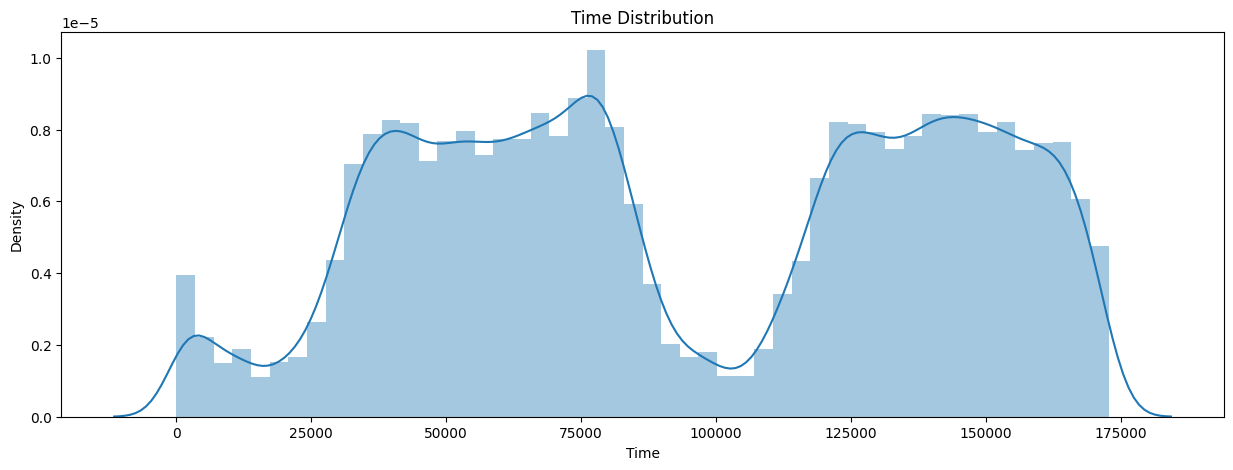

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Time Distribution')
sns.distplot(data.Time)

<Axes: title={'center': 'Distribution of transaction value'}, xlabel='Amount', ylabel='Density'>

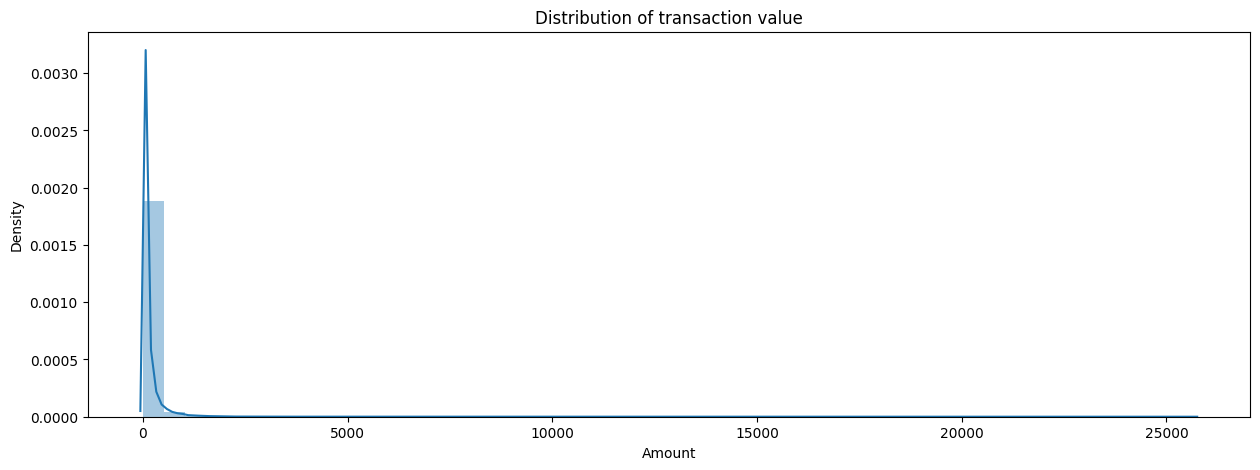

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Distribution of transaction value')
sns.distplot(data.Amount)

In [ ]:
#fraud vs. normal transactions
counts = data.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Ss expected, most transactions are non-fraudulent. The following visualization underlines this significant contrast.

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

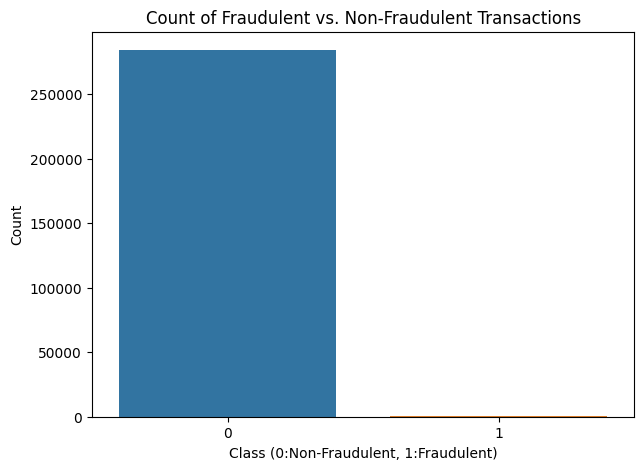

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Finally, it would be interesting to know if there are any significant correlations between our predictors, especially with regards to our class variable. One of the most visually appealing ways to determine that is by using a heatmap.

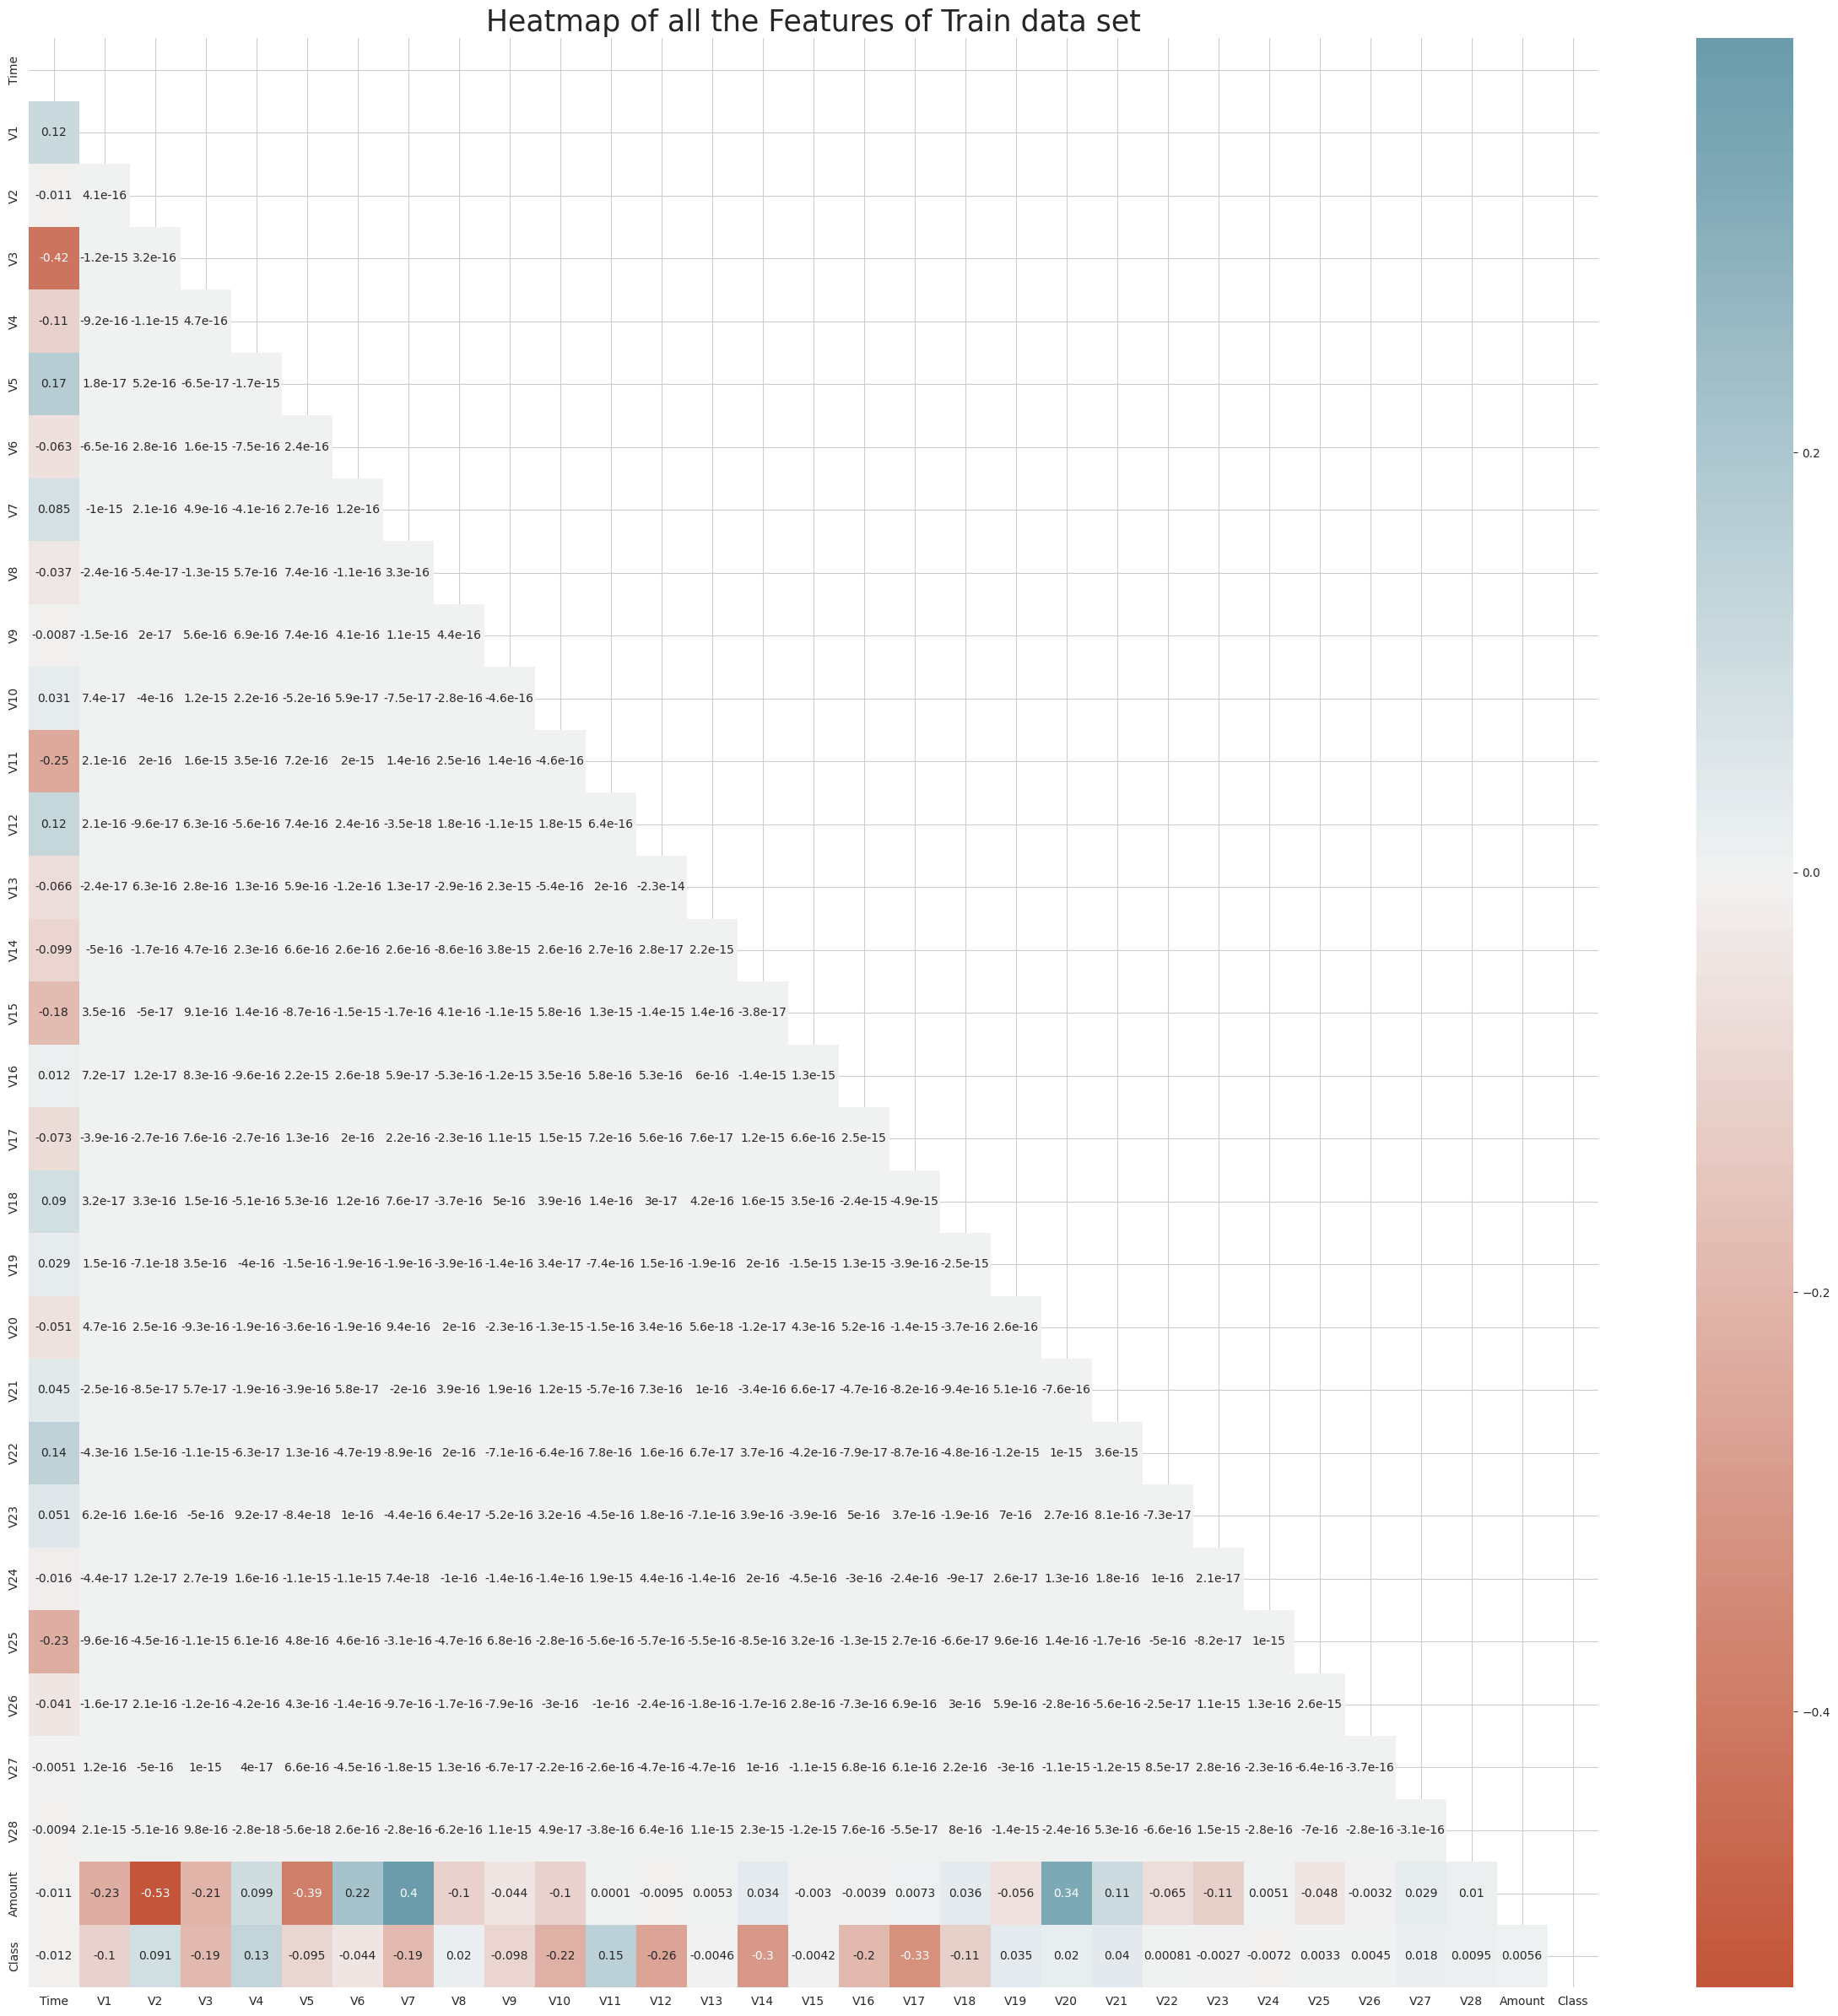

In [ ]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,30))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

As can see, some of our predictors do seem to be correlated with the Class variable. Nonetheless, there seem to be relatively little significant correlations for such a big number of variables. This can probably be attributed to two factors:

+ The data was prepared using a PCA, therefore our predictors are principal components.
+ The huge class imbalance might distort the importance of certain correlations with regards to our class variable.

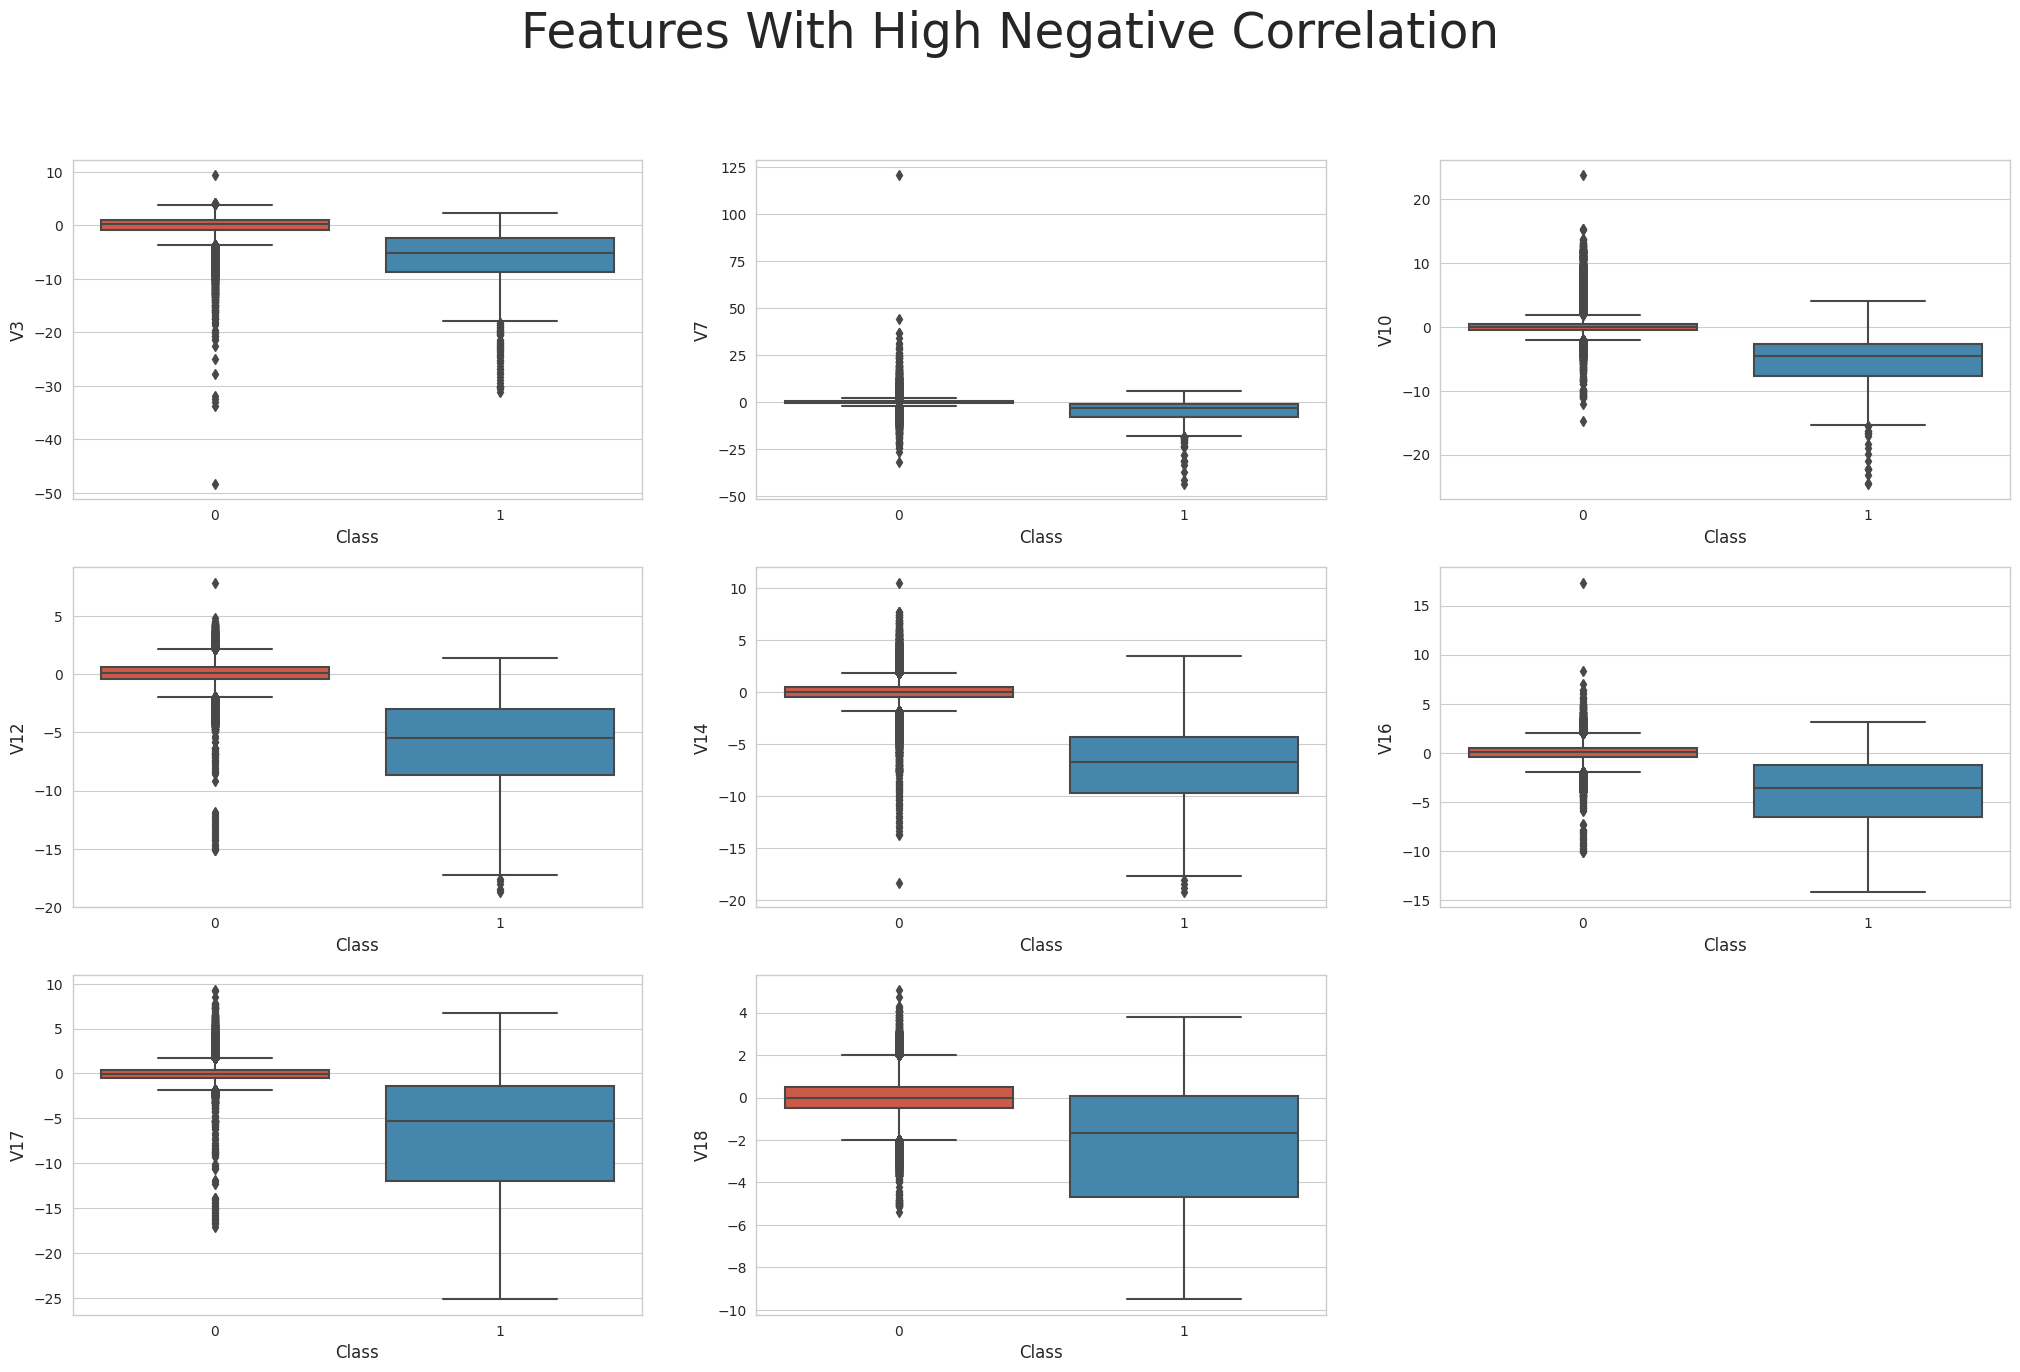

In [ ]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,15))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=data, ax=axes[0,0])
sns.boxplot(x="Class", y="V7", data=data, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=data, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=data, ax=axes[1,0])
sns.boxplot(x="Class", y="V14", data=data, ax=axes[1,1])
sns.boxplot(x="Class", y="V16", data=data, ax=axes[1,2])
sns.boxplot(x="Class", y="V17", data=data, ax=axes[2,0])
sns.boxplot(x="Class", y="V18", data=data, ax=axes[2,1])
f.delaxes(axes[2,2])

<Axes: xlabel='Class', ylabel='V11'>

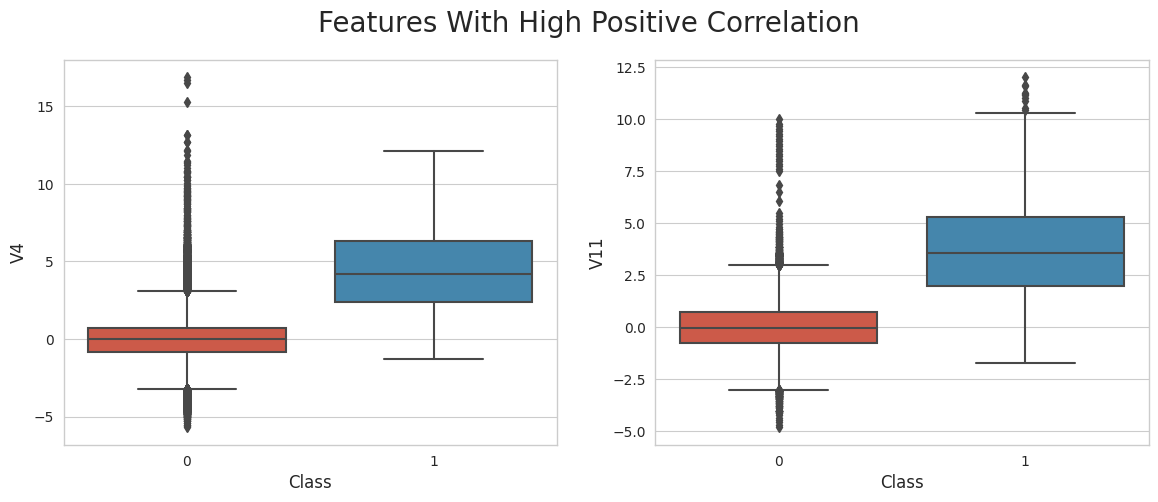

In [ ]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=data, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=data, ax=axes[1])

# 3. Methodology

Fraud detection is a binary classification task in which any transaction will be predicted and labeled as a fraud or legit. In this Notebook state of the art classification techniques were tried for this task and their performances were compared. :

+ LogisticRegression()
+ LinearDiscriminantAnalysis()
+ KNeighborsClassifier()
+ RandomForestClassifier()
+ DecisionTreeClassifier()
+ XGBClassifier()
+ GaussianNB()
+ GradientBoostingClassifier()
+ LGBMClassifier()

As we can see, there are a few algorithms that quite significantly outperformed the others. Probably, choosing Random Forest over XGBoost might be a reasonable approach in order to achieve a higher degree of comprehensiveness while only slightly decreasing performance. But fine, we will apply all of these algorithms to compare the results.

# Outlier Detection & Removal

Outlier detection is a complex topic. The trade-off between reducing the number of transactions and thus volume of information available to my algorithms and having extreme outliers skew the results of your predictions is not easily solvable and highly depends on your data and goals. In my case, I decided to focus exclusively on ML methods and will not focus on this topic. Other Kaggle Notebook have well discussed this topic.

It may help to remove outliers prior to applying the oversampling procedure, and this might be a helpful heuristic to use more generally.

# Creating a Training Set for a Heavily Imbalanced Data Set

Creating a training data set that will allow our algorithms to pick up the specific characteristics that make a transaction more or less likely to be fraudulent. Using the original data set would not prove to be a good idea for a very simple reason: Since over 99% of our transactions are non-fraudulent, an algorithm that always predicts that the transaction is non-fraudulent would achieve an accuracy higher than 99%. Nevertheless, that is the opposite of what we want. We do not want a 99% accuracy that is achieved by never labeling a transaction as fraudulent, we want to detect fraudulent transactions and label them as such.

# 4. Deal with Imbalanced Data using SMOTE

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when minority class has negligible or very lesser recall.

There are mainly 2 mainly algorithms that are widely used for handling imbalanced class distribution.

+ SMOTE
+ Near Miss Algorithm

SMOTE (Synthetic Minority Oversampling Technique) – Oversampling:

SMOTE is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

NearMiss Algorithm – Undersampling

NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. This helps in the classification process. To prevent problem of information loss in most under-sampling techniques, near-neighbor methods are widely used.

In [ ]:
def Definedata():
    # define dataset
    X=data.drop(columns=['Class']).values
    y=data['Class'].values
    return X, y
Definedata()
# print(y.isnull().sum())


(array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
          1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
        [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
        [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
         -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
        ...,
        [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
          4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
        [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
          1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
        [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]]),
 array([0, 0, 0, ..., 0, 0, 0]))

# We'll use 50% of the data for the test set and the remaining 50% for the training set

In [ ]:
pip install -U imbalanced-learn


# SMOTE With Selective Synthetic Sample Generation

In this section, we will review some extensions to SMOTE that are more selective regarding the examples from the minority class that provide the basis for generating new synthetic examples.

Borderline-SMOTE
A popular extension to SMOTE involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model. We can then oversample just those difficult instances, providing more resolution only where it may be required.

[Ref](https://link.springer.com/chapter/10.1007/11538059_91): Borderline-SMOTE: A New Over-Sampling Method in Imbalanced Data Sets Learning, 2005.

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


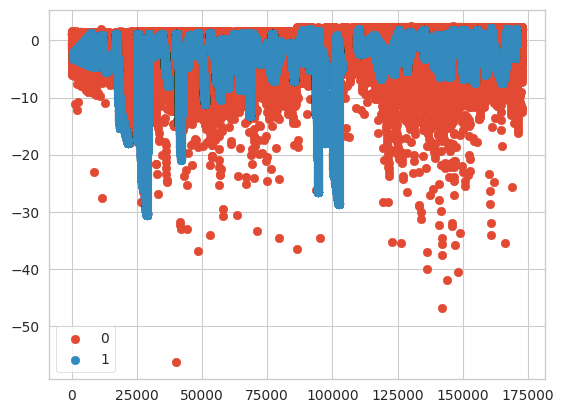

CPU times: user 9.13 s, sys: 726 ms, total: 9.85 s
Wall time: 12.3 s


In [ ]:
def SMOTE():
    # Import necessary libraries
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where

    # Call Definedata() to get your data
    X, y = Definedata()

    # Summarize class distribution before SMOTE
    counter = Counter(y)
    print(counter)

    # Apply SMOTE to balance the dataset
    smt = SMOTE(random_state=0)
    X, y = smt.fit_resample(X, y)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

    # Summarize the new class distribution after SMOTE
    counter = Counter(y)
    print(counter)

    # Plot the scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()

    return X_train, X_test, y_train, y_test

# Call the SMOTE() function and print the elapsed time
%time X_train1, X_test1, y_train1, y_test1 = SMOTE()


# Adaptive Synthetic Sampling (ADASYN)

Another approach involves generating synthetic samples inversely proportional to the density of the examples in the minority class.

That is, generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

This modification to SMOTE is referred to as the Adaptive Synthetic Sampling Method, or ADASYN, and was proposed to [Haibo He, et al.](https://ieeexplore.ieee.org/document/4633969) in their 2008 paper named for the method titled “ADASYN: Adaptive Synthetic Sampling Approach For Imbalanced Learning.”

In [ ]:
def ADASYN():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import ADASYN
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = ADASYN().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


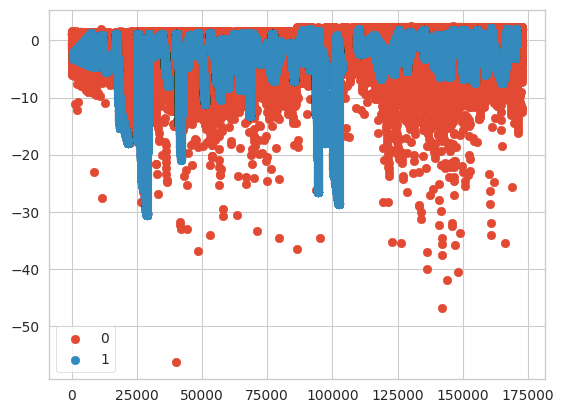

CPU times: user 8.93 s, sys: 619 ms, total: 9.55 s
Wall time: 11.5 s
Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284298})


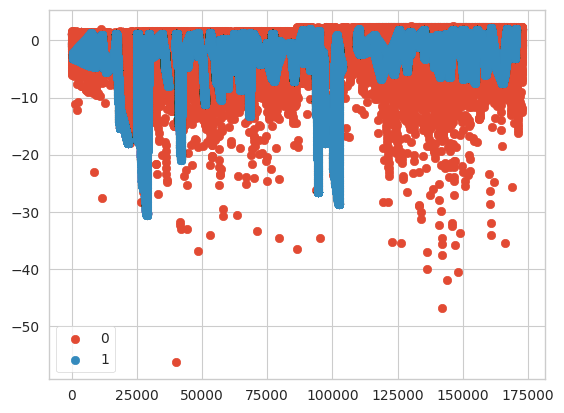

CPU times: user 15.7 s, sys: 637 ms, total: 16.3 s
Wall time: 24.5 s


In [ ]:
%time X_train1, X_test1, y_train1, y_test1 = SMOTE()
%time X_train4, X_test4, y_train4, y_test4 = ADASYN()

Unlike Borderline-SMOTE, we can see that the examples that have the most class overlap have the most focus. On problems where these low density examples might be outliers, the ADASYN approach may put too much attention on these areas of the feature space, which may result in worse model performance.

# 5. Machine Learning Algorithms

**Performance metrics**

A number of performance metrics could be used to report the performance of the fraud detection classifiers including the confusion matrix, Sensitivity, Specificity, false positive rate, balanced classification Rate and Matthews correlation coefficient.

Confusion matrix

A confusion matrix of a binary classifier is a table that shows the number of instances classified correctly/incorrectly in each class. The Confusion Matrix of a Binary Classifier.

_______________________________________________________________________
Actual |  Predicted

Positive (Legit)     |  true positive (TP)     |     false positive (FP)

Negative (Fraud)     |  false negative (FN)    |     true negative (TN)
_______________________________________________________________________

Specificity is defined as the number of fraud case predictions to the total number of fraud cases.

Specificity =TN/ (TN + FP)

Sensitivity is defined as the number of legit predictions compared to the total number of legit transactions. In fraud detection, the most important measure is specificity or fraud detection rate, as a higher value of recall means a lowest financial loss to the company.

Sensitivity =TP/ (TP + FN)

Accuracy gives the overall efficacy of the proposed system. It is defined as the total number of predictions to the total number of cases.

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Accuracy of the model can be misleading in case of credit card fraud detection, where the numbers of fraudulent transactions is
much lower than the legitimate transactions and the dataset is highly imbalanced. Selecting the right performance metrics depends on the business objective because one measure can help to prevent financial losses and the other can help to gain customer satisfaction.

<img src="https://i.ibb.co/F4PS1b0/False-True.jpg" alt="False-True" border="0"></a>

In [ ]:
# def Models(models, X_train, X_test, y_train, y_test, title):
#     model = models
#     model.fit(X_train,y_train)

#     X, y = Definedata()
#     train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
#     test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
#     matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])

#     f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(20, 3))
#     #f = plt.figure(figsize=(20, 3))

#     g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 16},ax=ax1)
#     g1.set_title(title)
#     g1.set_ylabel('Total Fraud = {}'.format(y_train.sum()), fontsize=14, rotation=90)
#     g1.set_xlabel('Accuracy score for Trainingset: {}'.format(accuracy_score(model.predict(X_train), y_train)))

#     g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 16},ax=ax2)
#     g2.set_ylabel('Total Fraud = {}'.format(y_test.sum()), fontsize=14, rotation=90)
#     g2.set_xlabel('Accuracy score for Testingset: {}'.format(accuracy_score(model.predict(X_test), y_test)))

#     g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 16},ax=ax3)
#     g3.set_ylabel('Total Fraud = {}'.format(y.sum()), fontsize=14, rotation=90)
#     g3.set_xlabel('Accuracy score for Totalset: {}'.format(accuracy_score(model.predict(X), y)))

#     plt.show()
#     return y, model.predict(X)

# def Featureimportances(models, X_train, y_train):
#     model = models
#     model.fit(X_train,y_train)
#     importances = model.feature_importances_
#     features = df_test.columns[:9]
#     imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
#     imp['Sum Importance'] = imp['Importance'].cumsum()
#     imp = imp.sort_values(by = 'Importance')
#     return imp

In [ ]:
from sklearn.metrics import classification_report

def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train, y_train)

    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(20, 3))

    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False, annot_kws={"size": 16}, ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total Fraud = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('Accuracy score for Trainingset: {}'.format(accuracy_score(model.predict(X_train), y_train)))

    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f", cbar=False, annot_kws={"size": 16}, ax=ax2)
    g2.set_ylabel('Total Fraud = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('Accuracy score for Testingset: {}'.format(accuracy_score(model.predict(X_test), y_test)))

    g3 = sns.heatmap(matrix, annot=True, fmt=".1f", cbar=False, annot_kws={"size": 16}, ax=ax3)
    g3.set_ylabel('Total Fraud = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('Accuracy score for Totalset: {}'.format(accuracy_score(model.predict(X), y)))

    plt.show()

    # Calculate precision, recall, and F1 score for each class
    y_pred = model.predict(X)
    report = classification_report(y, y_pred, target_names=['Class 0', 'Class 1'])
    print("Classification Report:\n", report)

    return y, y_pred

def Featureimportances(models, X_train, y_train):
    model = models
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by='Importance')
    return imp


In [ ]:
print(data.shape)


(284807, 31)


In [ ]:
print((data['Class'] == 1).value_counts())
print((data['Class'] == 0).value_counts())


False    284315
True        492
Name: Class, dtype: int64
True     284315
False       492
Name: Class, dtype: int64


# 6. Results

The 9 fraud detection models were trained and tested using 4 SMOTE approaches.

The performance results are then recorded and illustrated. This methodological approach ensures that all data were represented once as a test data and several times as a training data producing accurate results.

#

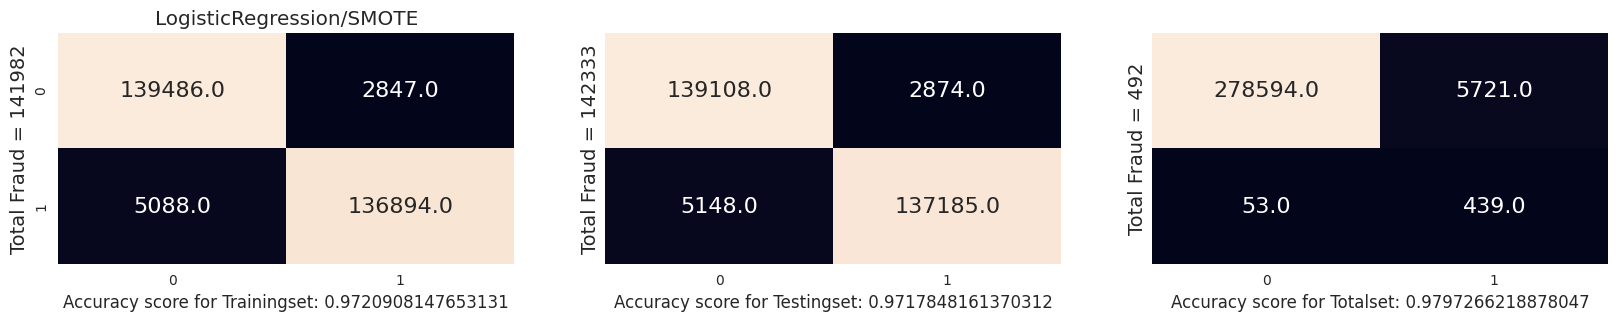

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99    284315
     Class 1       0.07      0.89      0.13       492

    accuracy                           0.98    284807
   macro avg       0.54      0.94      0.56    284807
weighted avg       1.00      0.98      0.99    284807

CPU times: user 6.15 s, sys: 1.82 s, total: 7.97 s
Wall time: 7.96 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 1, 0, ..., 0, 0, 0]))

In [ ]:
title = 'LogisticRegression/SMOTE'
%time Models(LogisticRegression(),X_train1, X_test1, y_train1, y_test1, title)

In [ ]:
# title = 'LogisticRegression/BSMOTE'
# %time Models(LogisticRegression(),X_train2, X_test2, y_train2, y_test2, title)

Accuracy = 99.26%, but I do not love this, we still have 64/492 Frauds not well predicted (or 13% WRONG).

In [ ]:
# title = 'LogisticRegression/SMOTESVM'
# %time Models(LogisticRegression(),X_train3, X_test3, y_train3, y_test3, title)

**Wow, let stop here.**

The accuracy comes out to be 99.2% but the Fraud prediction rate is 83.4% and NOT 99%. The recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.

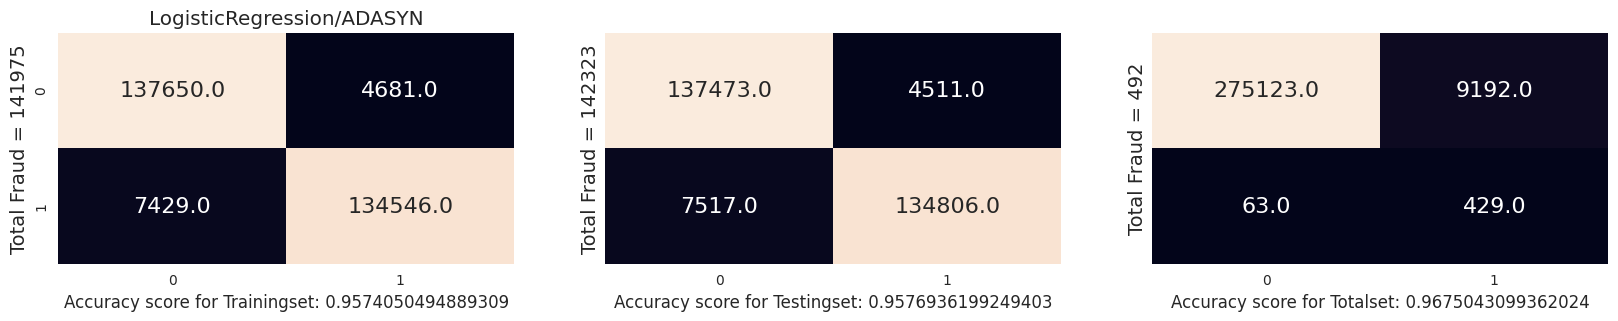

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.97      0.98    284315
     Class 1       0.04      0.87      0.08       492

    accuracy                           0.97    284807
   macro avg       0.52      0.92      0.53    284807
weighted avg       1.00      0.97      0.98    284807

CPU times: user 5.17 s, sys: 1.67 s, total: 6.84 s
Wall time: 3.88 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
title = 'LogisticRegression/ADASYN'
%time Models(LogisticRegression(),X_train4, X_test4, y_train4, y_test4, title)

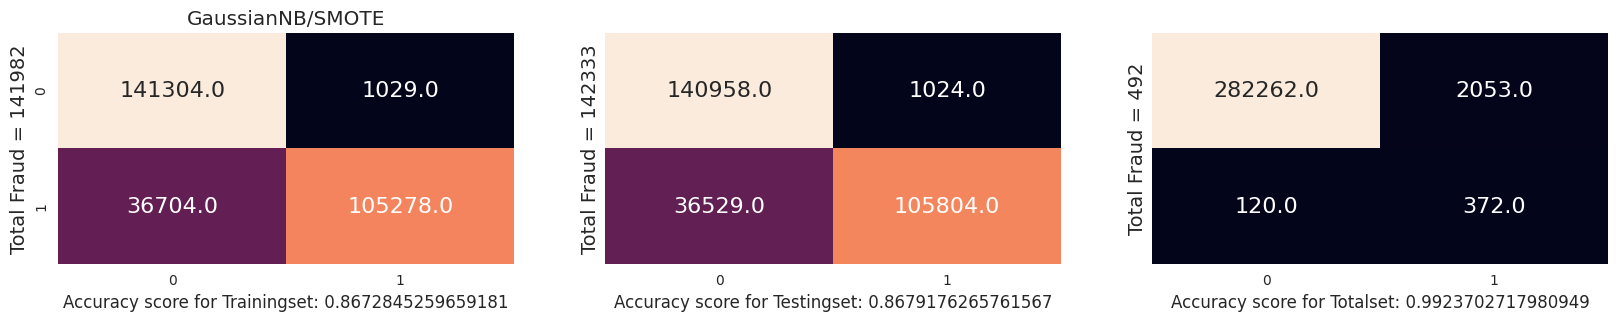

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00    284315
     Class 1       0.15      0.76      0.26       492

    accuracy                           0.99    284807
   macro avg       0.58      0.87      0.63    284807
weighted avg       1.00      0.99      0.99    284807

CPU times: user 2.36 s, sys: 542 ms, total: 2.9 s
Wall time: 2.8 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
title = 'GaussianNB/SMOTE'
%time Models(GaussianNB(),X_train1, X_test1, y_train1, y_test1, title)

Or here, we get accuracy = 99.53%, but upto 37% (182/492) of Frauds are not well detected.

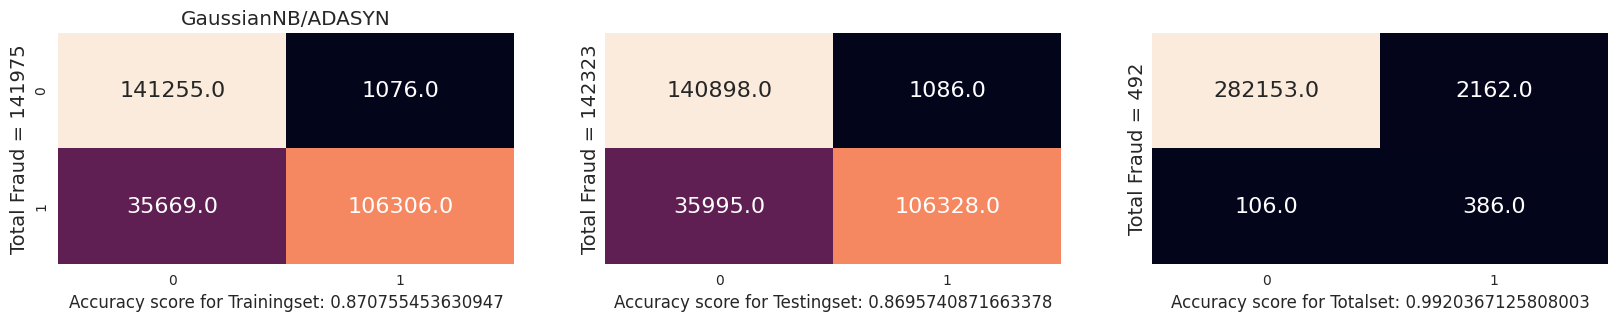

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00    284315
     Class 1       0.15      0.78      0.25       492

    accuracy                           0.99    284807
   macro avg       0.58      0.89      0.62    284807
weighted avg       1.00      0.99      0.99    284807

CPU times: user 2.29 s, sys: 514 ms, total: 2.8 s
Wall time: 2.82 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
title = 'GaussianNB/ADASYN'
%time Models(GaussianNB(),X_train4, X_test4, y_train4, y_test4, title)

**OR, the same situation we face with this model.**

The accuracy for Total Dataset is 99.19% but the Fraud prediction rate is 78.4% and NOT 99.2%.

In [ ]:
# title = 'KNeighbor
# sClassifier/SMOTE'
# %time Models(KNeighborsClassifier(n_neighbors=1),X_train1, X_test1, y_train1, y_test1, title)

In [ ]:
# title = 'KNeighborsClassifier/ADASYN'
# %time Models(KNeighborsClassifier(n_neighbors=1),X_train4, X_test4, y_train4, y_test4, title)

Yeah! All Frauds are well detected, accuracy = 98.9%, but the Bank might not like it, since normal transactions are detected as Fraud.

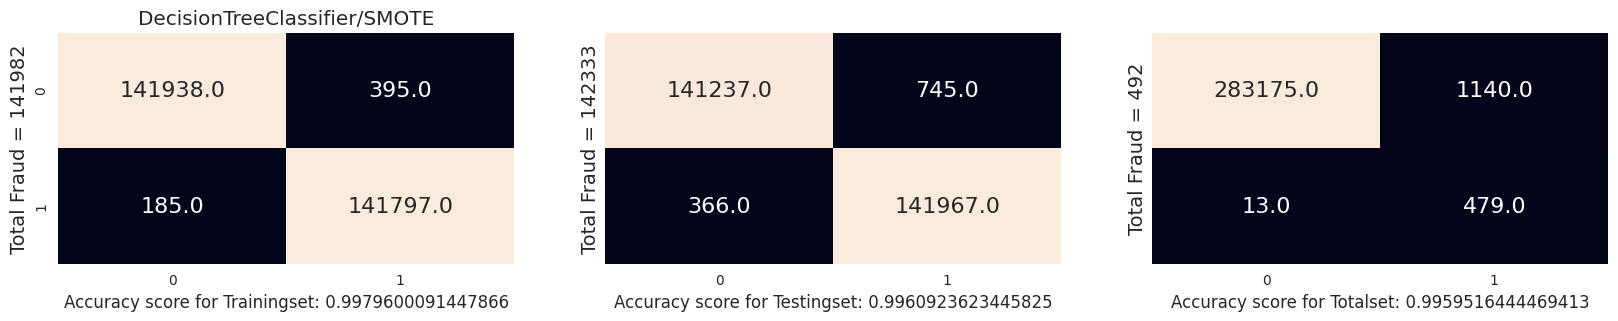

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    284315
     Class 1       0.30      0.97      0.45       492

    accuracy                           1.00    284807
   macro avg       0.65      0.98      0.73    284807
weighted avg       1.00      1.00      1.00    284807

CPU times: user 26 s, sys: 218 ms, total: 26.2 s
Wall time: 26.1 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
title = 'DecisionTreeClassifier/SMOTE'
%time Models(DecisionTreeClassifier(max_depth=14),X_train1, X_test1, y_train1, y_test1, title)

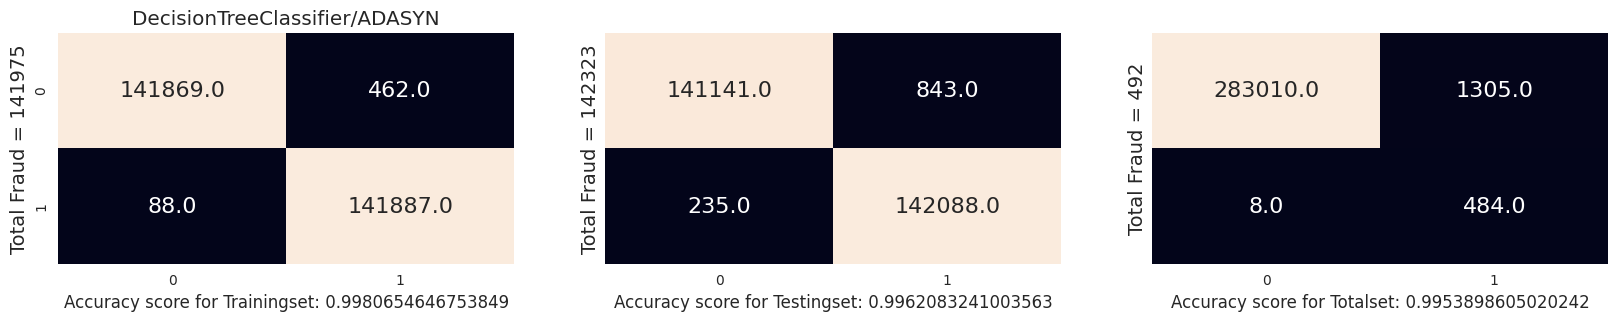

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    284315
     Class 1       0.27      0.98      0.42       492

    accuracy                           1.00    284807
   macro avg       0.64      0.99      0.71    284807
weighted avg       1.00      1.00      1.00    284807

CPU times: user 26.1 s, sys: 210 ms, total: 26.3 s
Wall time: 26.2 s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
title = 'DecisionTreeClassifier/ADASYN'
%time Models(DecisionTreeClassifier(max_depth=14),X_train4, X_test4, y_train4, y_test4, title)

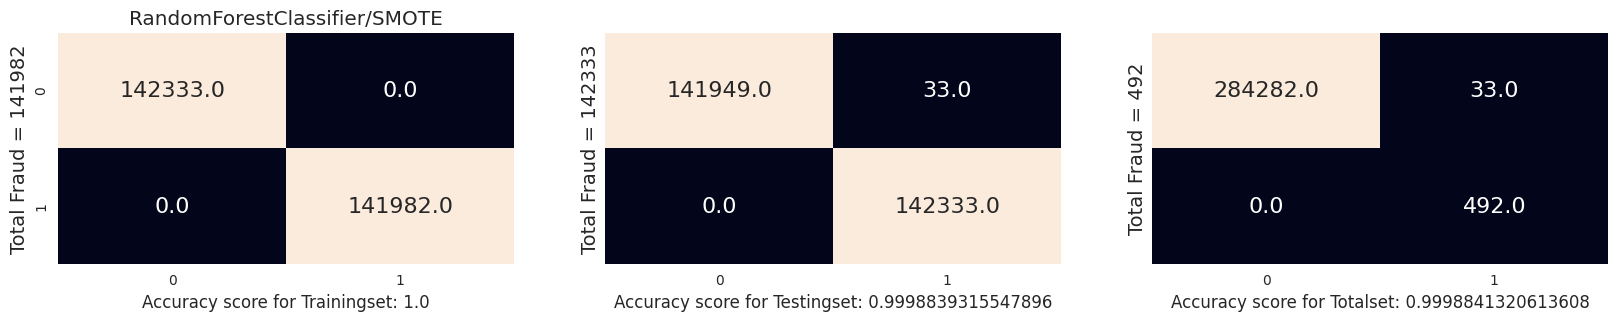

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    284315
     Class 1       0.94      1.00      0.97       492

    accuracy                           1.00    284807
   macro avg       0.97      1.00      0.98    284807
weighted avg       1.00      1.00      1.00    284807

CPU times: user 5min 40s, sys: 508 ms, total: 5min 40s
Wall time: 5min 43s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
title = 'RandomForestClassifier/SMOTE'
%time Models(RandomForestClassifier(),X_train1, X_test1, y_train1, y_test1, title)

Yes, this is what we wanted. Only 18 normal transactions are wrong detected.

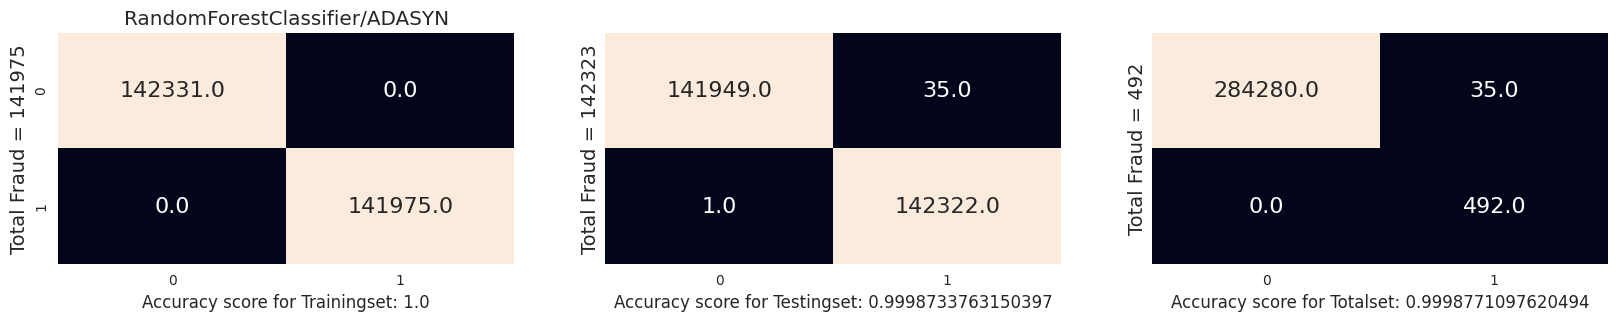

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    284315
     Class 1       0.93      1.00      0.97       492

    accuracy                           1.00    284807
   macro avg       0.97      1.00      0.98    284807
weighted avg       1.00      1.00      1.00    284807

CPU times: user 5min 50s, sys: 544 ms, total: 5min 50s
Wall time: 5min 50s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
title = 'RandomForestClassifier/ADASYN'
%time Models(RandomForestClassifier(),X_train4, X_test4, y_train4, y_test4, title)

And might be, this is the BEST one !

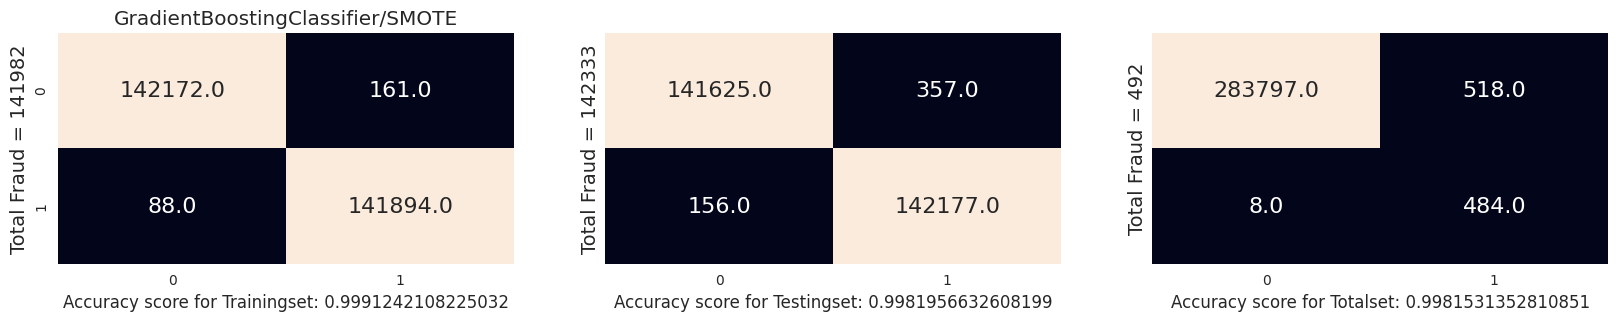

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    284315
     Class 1       0.48      0.98      0.65       492

    accuracy                           1.00    284807
   macro avg       0.74      0.99      0.82    284807
weighted avg       1.00      1.00      1.00    284807

CPU times: user 2min 49s, sys: 443 ms, total: 2min 50s
Wall time: 2min 50s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
title = 'GradientBoostingClassifier/SMOTE'
%time Models(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0),X_train1, X_test1, y_train1, y_test1, title)

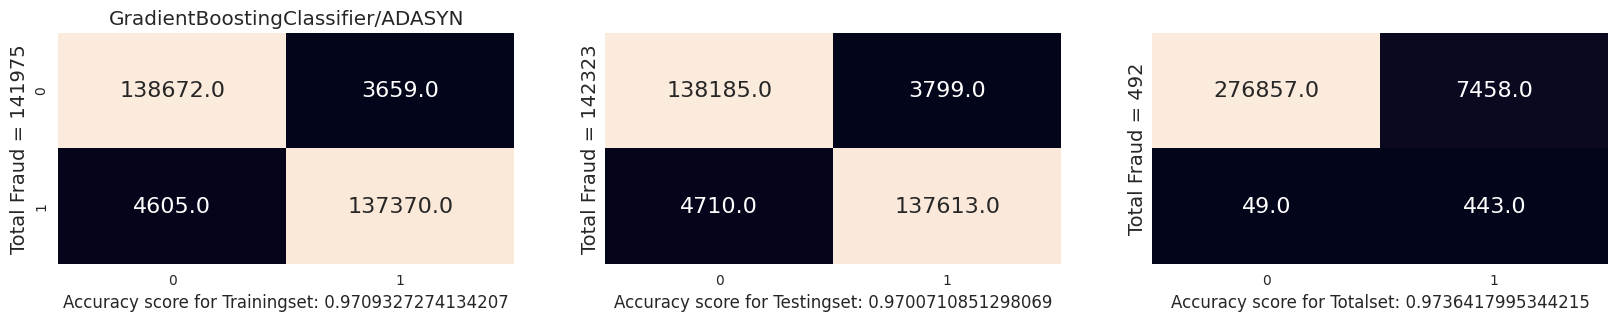

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.97      0.99    284315
     Class 1       0.06      0.90      0.11       492

    accuracy                           0.97    284807
   macro avg       0.53      0.94      0.55    284807
weighted avg       1.00      0.97      0.99    284807

CPU times: user 2min 49s, sys: 418 ms, total: 2min 49s
Wall time: 2min 49s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
title = 'GradientBoostingClassifier/ADASYN'
%time Models(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0),X_train4, X_test4, y_train4, y_test4, title)

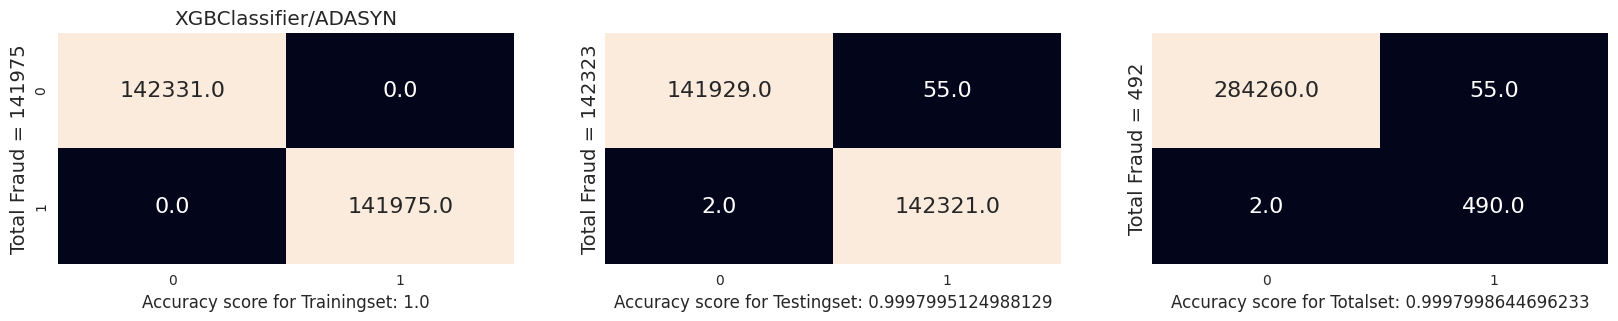

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    284315
     Class 1       0.90      1.00      0.95       492

    accuracy                           1.00    284807
   macro avg       0.95      1.00      0.97    284807
weighted avg       1.00      1.00      1.00    284807

CPU times: user 6min 4s, sys: 578 ms, total: 6min 5s
Wall time: 3min 27s


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
title = 'XGBClassifier/ADASYN'
%time Models(XGBClassifier(),X_train4, X_test4, y_train4, y_test4, title)

This might be also a BEST selection.

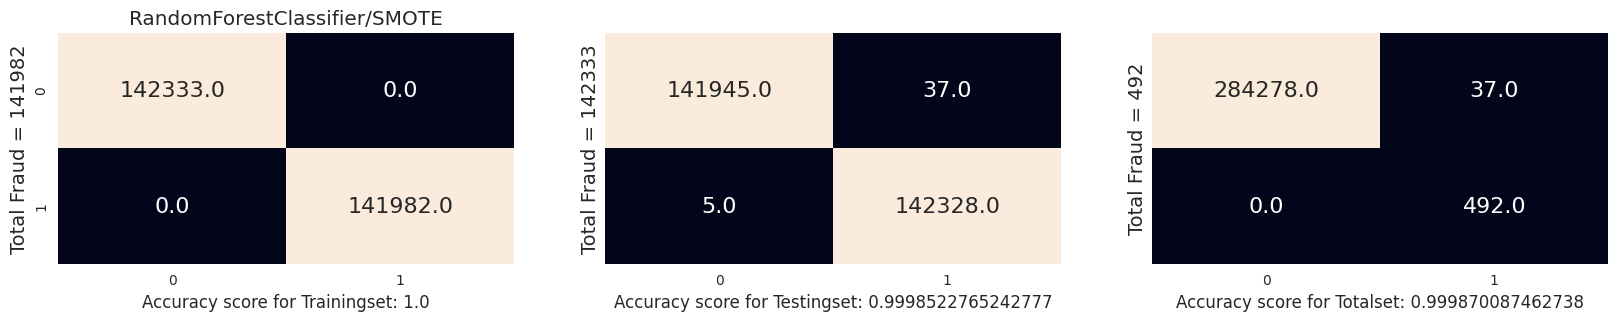

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    284315
     Class 1       0.93      1.00      0.96       492

    accuracy                           1.00    284807
   macro avg       0.97      1.00      0.98    284807
weighted avg       1.00      1.00      1.00    284807



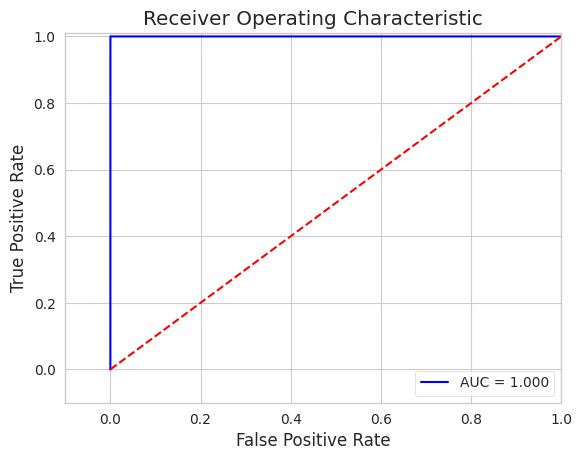

In [ ]:
from sklearn.metrics import confusion_matrix,auc,roc_curve

title = 'RandomForestClassifier/SMOTE'
y, ypred =  Models(RandomForestClassifier(),X_train1, X_test1, y_train1, y_test1, title)

fpr, tpr, thresholds = roc_curve(y, ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 7. Conclusion & Future Work

In total of 9 algorithms combined with 4 SMOTE approaches were used in developing fraud detection models to classify a transaction as fraudulent or legitimate. Three metrics were used in evaluating their performances. The results showed that there is probably no data mining technique that is universally better than others. Performance improvement could be achieved through developing a fraud detection model using a combination of different algorithm and SMOTE approches. It could be observed that 4 following algorithms outperformed other models in terms of the Accuracy.

1. RandomForestClassifier using the SMOTE
2. RandomForestClassifier using the ADASYN
3. XGBClassifier using the SMOTE
4. XGBClassifier using the ADASYN

Fraud detection is a complex issue that requires a substantial amount of planning before throwing machine learning algorithms at it. Nonetheless, it is also an application of data science and machine learning for the good, which makes sure that the customer’s money is safe and not easily tampered with.

Future work will include a comprehensive tuning of these 4 algorithms. Having a data set with non-anonymized features would make this particularly interesting as outputting the feature importance would enable one to see what specific factors are most important for detecting fraudulent transactions.